## EECS 491 Assignment 1
Yue Shu

# Q1. Basic Probability

## 1.1 
**Prove
\begin{equation}
p(x,y|z) = p(x|z)p(y|x,z)
\end{equation}**

*Proof:* 
$$ p(x,y|z) = \frac{p(x,y,z)}{p(z)} $$
$$ p(x,y,z) = p(y|x,z)p(x,z) $$
$$ p(x,y|z) = \frac{p(y|x,z)p(x,z)}{p(z)} $$
$$ \frac{p(x,z)}{p(z)} = p(x|z) $$
$$ p(x,y|z) = p(y|x,z)p(x|z) $$
Therefore, 
\begin{equation}
p(x,y|z) = p(x|z)p(y|x,z)
\end{equation}

## 1.2 
**Prove**  
\begin{equation}
p(x|y,z) = \frac{p(y|x,z)p(x|z)}{p(y|z)}
\end{equation}

*Proof:* 
$$ p(x|y,z) = \frac{p(x,y,z)}{p(y,z)} $$
$$ p(x,y,z) = p(y|x,z)p(x,z) $$
$$ p(x|y,z) = \frac{p(y|x,z)p(x,z)}{p(y,z)} $$
$$ p(x,z) = p(x|z)p(z) $$
$$ p(y,z) = p(y|z)p(z) $$
Therefore, 
$$ p(x|y,z) = \frac{p(y|x,z)p(x|z)p(z)}{p(y|z)p(z)} = \frac{p(y|x,z)p(x|z)}{p(y|z)}$$

# Q2. Independence

## 2.1 
**Show that independence is not transitive, i.e. 
$a ⫫ b ∧ b ⫫ c ⇏ a ⫫ c$. Define a joint probability distribution $p(a,b,c)$ for which the previous expression holds and provide an interpretation.**

*Proof:* 

  Let's define a probability distribution set as follow: $p(a) = 0.4$, $p(b) = 0.8$, $p(c) = 0.3$,  
  while $p(a ∧ b) = 0.32$, $p(b ∧ c) = 0.24$, $p(a ∧ c) = 0.1$, $p(a ∧ b ∧ c) = 0.12$.

According to the definition of proposition independence, $x$ and $y$ are independent if and only if $p(x ∧ y) = p(x) * p(y)$.

Therefore, by the defined joint probability distribution, $a ⫫ b ∧ b ⫫ c$ since $p(a ∧ b) = 0.32 = p(a) * p(b)$ and $p(b ∧ c) = 0.24 = p(b) * p(c)$, whereas $a \not\!\perp\!\!\!\perp c$ since $p(a ∧ c) = 0.1 \neq p(a) * p(c) = 0.12$.

Finally, we can also see that  $p(a ∧ b ∧ c) = 0.12 \neq p(a) * p(b) * p(c) = 0.96$, which further proves that this is not an independent set.

Therefore, we may conclude that independence is not transitive, i.e. $a ⫫ b ∧ b ⫫ c ⇏ a ⫫ c$.

## 2.2
**Show that conditional independence does not imply marginal independence, i.e. $a ⫫ b | c ⇏ a ⫫ b$. Again provide an example.**

*Proof:* 

  Let's define a conditional probability distribution set as follow: $p(a) = 0.4$, $p(b) = 0.8$, $p(a ∧ b) = 0.28$.  
  Also, $p(a|c) = 0.5$, $p(b|c) = 0.6$, $p(a ∧ b|c) = 0.3$.
  
By definition of conditional independence, $a ⫫ b | c ⇔ (a | c) ⫫ (b | c) ⇔ p(a|c) * p(b|c) = p(a ∧ b|c)$.

Therefore, by the defined conditional probability distribution, $a ⫫ b | c$ since $p(a|c) * p(b|c) = 0.3 = p(a ∧ b|c)$.

However, $a \not\!\perp\!\!\!\perp b$ since $p(a ∧ b) = 0.28 \neq p(a) * p(b) = 0.32$.

Therefore, we shall conclude that conditional independence does not imply marginal independence, i.e. $a ⫫ b | c ⇏ a ⫫ b$.

# Q3. Inspector Clouseau re-revisited

## 3.1

**Write a program to evaluate $p(B|K)$ in Example 1.3 in Barber. Write your code and choose your data representations so that it is easy to use it to solve the remaining questions. Show that it correctly computes the value in the example.** 

Let's first define the variables we will be using in the program to make it clear:

  `pb`: $p(B = murderer)$  
  `pm`: $p(M = murderer)$  
  `pKBM`: $p(K,B,M)$  
  `pnm`: $p(M = not~murderer)$  
  And for conditional probabilities, `_` in a variable is equivalent to `|`, for example, `pa_b` means $p(a|b)$, `pab_c` means $p(a,b|c)$.  

In [1]:
pb = 0.6
pm = 0.2
pk_nbnm = 0.3
pk_nbm = 0.2
pk_bnm = 0.6
pk_bm = 0.1
## Calculating the value of p(B|K) according to equation 1.2.7 in Example 1.3 in Barber
def __pB_K__(pB, pk_Bm, pk_Bnm):
    pB_K = (pB * (pk_Bm * pm + pk_Bnm * (1 - pm))) / (pb * (pk_bm * pm + pk_bnm * (1 - pm)) + 
                                                      (1 - pb) * (pk_nbm * pm + pk_nbnm * (1 - pm)))
    return pB_K
## The value of p(B = murderer|K)
pb_k = __pB_K__(pb, pk_bm, pk_bnm)
## The value of p(B = not murderer|K)
pnb_k = __pB_K__(1 - pb, pk_nbm, pk_nbnm)
print("The answer to problem 3.1, p(B|K) = <" + str(pb_k) + ", " + str(pnb_k) + ">.")

The answer to problem 3.1, p(B|K) = <0.7281553398058251, 0.27184466019417475>.


  According to equation 1.2.8 in Example 1.3, the result of $p(B = murderer|knife~used)$ is rounded to 0.73, which conforms with the answer we just got above. Also, the normalized results of $p(b|K)$ and $p(\neg b|K)$ sum to 1 correctly.  
  Therefore, my function correctly computes the value in the example.

## 3.2 

**Define a different distribution for $p(K|M,B)$.  Your new distribution should result in the outcome that $p(B|K)$ is either $<0.1$ or $>0.9$, i.e. reasonably strong evidence.  Use the original values of $p(B)$ and $p(M)$ from the example.  Provide (invent) a reasonble justification for the value of each entry in $p(K|M,B)$.** 

  Let's suppose that we have reasonably strong evidence implying the guilty of the Butler.  
  To make that happen, we need to ensure that the Butler is more likely to use knife as a murder weapon rather than the Maid.
  
  `pk_nbnm = 0.05`: it is very unlikely that the knife is used by someone else other than the two suspects we have since this is a locked room murder and the murderer cannot escape!  
  `pk_nbm = 0.2`: it is less likely that the Maid would use the knife as a murder weapon since she might be too weak to stab the knife into the victim.  
  `pk_bnm = 0.75`: it is very likely that the strong merciless Butler would use the knife as a murder weapon.  
  `pk_bm = 0.3`: it is possible that the two conspiracies would use the knife as murder weapon together.
  
Now that we have the values, let's plug them in and see the outcome: 

In [2]:
pk_nbnm = 0.05
pk_nbm = 0.2
pk_bnm = 0.75
pk_bm = 0.3
## The value of p(B = murderer|K)
pb_k = __pB_K__(pb, pk_bm, pk_bnm)
## The value of p(B = not murderer|K)
pnb_k = __pB_K__(1 - pb, pk_nbm, pk_nbnm)
print("The answer to problem 3.2, p(B|K) = <" + str(pb_k) + ", " + str(pnb_k) + ">.")

The answer to problem 3.2, p(B|K) = <0.9252336448598131, 0.07476635514018691>.


Now we have reasonably strong evidence that the Butler is the murderer, as we wish. Guess who's the dirty cop?

## 3.3

**Derive the equation for $p(M|K)$.** 

We can derive the equation for $p(M|K)$ following the equation 1.2.7 in Example 1.3 in the textbook as follow:  

$$ p(M|K) = \sum_{b} p(M,b|K) = \sum_{b} \frac{p(M,b,K)}{p(K)} = \frac{\sum_{b} p(K|M,b)p(M,b)}{\sum_{b, m} p(K|b,m)p(b,m)} $$
$$ p(M|K) = \frac{p(M)\sum_{b} p(K|M,b)p(b)}{\sum_{m} p(m) \sum_{b} p(K|b,m)p(b)} $$ 

And then we shall derive a function according to the equation above to calculate $p(M|K)$:

In [3]:
def __pM_K__(pM, pk_bM, pk_nbM):
    pM_K = (pM * (pk_bM * pb + pk_nbM * (1 - pb))) / (pm * (pk_bm * pb + pk_nbm * (1 - pb)) + 
                                                      (1 - pm) * (pk_bnm * pb + pk_nbnm * (1 - pb)))
    return pM_K

## 3.4

**Calculate it's value for both the original $p(K|M,B)$ and the one you defined yourself. Is it possible to provide a summary of the main factors that contributed to the value?  Why/Why not?  Explain.** 

### Original entry
Let's first take a look at the result calculated with the original $p(K|M,B)$:

In [4]:
## The original value set
pk_nbnm = 0.3
pk_nbm = 0.2
pk_bnm = 0.6
pk_bm = 0.1

## The value of p(M = murderer|K)
pm_k = __pM_K__(pm, pk_bm, pk_nbm)
## The value of p(M = not murderer|K)
pnm_k = __pM_K__(1 - pm, pk_bnm, pk_nbnm)

print("The answer to problem 3.4.1, p(M|K) = <" + str(pm_k) + ", " + str(pnm_k) + ">.")

The answer to problem 3.4.1, p(M|K) = <0.06796116504854369, 0.9320388349514562>.


### Modified entry
Let's now take a look at the result calculated with my modified $p(K|M,B)$:

In [5]:
## The modified value set
pk_nbnm = 0.05
pk_nbm = 0.2
pk_bnm = 0.75
pk_bm = 0.3

## The value of p(M = murderer|K)
pm_k = __pM_K__(pm, pk_bm, pk_nbm)
## The value of p(M = not murderer|K)
pnm_k = __pM_K__(1 - pm, pk_bnm, pk_nbnm)

print("The answer to problem 3.4.2, p(M|K) = <" + str(pm_k) + ", " + str(pnm_k) + ">.")

The answer to problem 3.4.2, p(M|K) = <0.12149532710280375, 0.8785046728971962>.


  If we compare the two results, we shall see that the probability that the Maid was the murderer is actually higher in our modified condition!  
  Besides a slightly higher value of $p(k|b,\neg m)$ in our modified dataset, the two major differences between the originial and modified $p(K|M,B)$ is that our modified dataset has a smaller $p(k|\neg b, \neg m)$ and a larger $p(k|b,m)$.  
  Since it's not so favorable to look for main factors while there are too many variables in the dataset, I will make a few more comparisons variating one single entry from the original dataset each time. 

### Trial One: smaller  $p(k|\neg b, \neg m)$
Variating only the $p(k|\neg b, \neg m)$ to be $1/3$ of the original value slightly increases the probability of $p(m|k)$ as shown below:

In [6]:
pk_nbnm = 0.1
pk_nbm = 0.2
pk_bnm = 0.6
pk_bm = 0.1

## The value of p(M = murderer|K)
pm_k = __pM_K__(pm, pk_bm, pk_nbm)
## The value of p(M = not murderer|K)
pnm_k = __pM_K__(1 - pm, pk_bnm, pk_nbnm)

print("The result of trial one is p(M|K) = <" + str(pm_k) + ", " + str(pnm_k) + ">.")

The result of trial one is p(M|K) = <0.08045977011494251, 0.9195402298850575>.


### Trial Two: larger $p(k|b,\neg m)$
Increasing only the $p(k|b,\neg m)$ by $1/3$ of the original value slightly decreases the probability of $p(m|k)$ as shown below:

In [7]:
pk_nbnm = 0.3
pk_nbm = 0.2
pk_bnm = 0.8
pk_bm = 0.1

## The value of p(M = murderer|K)
pm_k = __pM_K__(pm, pk_bm, pk_nbm)
## The value of p(M = not murderer|K)
pnm_k = __pM_K__(1 - pm, pk_bnm, pk_nbnm)

print("The result of trial two is p(M|K) = <" + str(pm_k) + ", " + str(pnm_k) + ">.")

The result of trial two is p(M|K) = <0.05511811023622048, 0.9448818897637795>.


### Trial Three: larger $p(k|b,m)$
Increasing only the $p(k|b,m)$ by $1/3$ of the original value slightly increases the probability of $p(m|k)$ as shown below:

In [8]:
pk_nbnm = 0.3
pk_nbm = 0.2
pk_bnm = 0.6
pk_bm = 0.13

## The value of p(M = murderer|K)
pm_k = __pM_K__(pm, pk_bm, pk_nbm)
## The value of p(M = not murderer|K)
pnm_k = __pM_K__(1 - pm, pk_bnm, pk_nbnm)

print("The result of trial three is p(M|K) = <" + str(pm_k) + ", " + str(pnm_k) + ">.")

The result of trial three is p(M|K) = <0.07603464870067374, 0.9239653512993262>.


### Trial Four: larger $p(k|\neg b,m)$
Increasing only the $p(k|\neg b,m)$ by $1/3$ of the original value slightly increases the probability of $p(m|k)$ as shown below:

In [9]:
pk_nbnm = 0.3
pk_nbm = 0.26
pk_bnm = 0.6
pk_bm = 0.1

## The value of p(M = murderer|K)
pm_k = __pM_K__(pm, pk_bm, pk_nbm)
## The value of p(M = not murderer|K)
pnm_k = __pM_K__(1 - pm, pk_bnm, pk_nbnm)

print("The result of trial four is p(M|K) = <" + str(pm_k) + ", " + str(pnm_k) + ">.")

The result of trial four is p(M|K) = <0.07869481765834933, 0.9213051823416507>.


### Conclusion
  As we can see from the four trials above, variating the entries of $p(K|B,M)$ by $1/3$ contributes to the same extent of variance to the fianl result we get. Therefore, all four are the factors that contributed to the value, or in other words, none of the entires is the main factor that affects the value.  
  In fact, $p(M)$ is the main factor to the value as we also can conclude from the equation we derived from part 3.3. 

# Q4. Biased views

## 4.1
**Write a program that calculates the posterior distribution of the $\theta$ (probability of heads) from the Binomial distribution given $y$ heads out of $n$ trials.  Feel free to use a package where the necessary distributions are defined as primitives.**

First of all let's derive all the equations and expressions we need:

  The `likelihood` (probability of getting $y$ heads out of n trials with a heads probability of $\theta $):
  $$ p(y | \theta, n) = {n \choose y} \theta^y (1 - \theta)^{n-y}$$
  The `prior` (what is our "view" on the coin bias):
  $$ p(\theta|n) $$ 
  The `normalizing constant`:
  $$ p(y|n) = \int_{0}^1 p(y|\theta,n)p(\theta|n)d\theta = \frac{1}{n + 1}$$
  And then we shall come up with the equation of the `posterior distribution` of $\theta$ given uninformative prior:
  $$ p(\theta|y,n) = {n \choose y} \theta^y (1 - \theta)^{n - y}(n + 1) $$
  
Now we shall derive a function of the posterior distribution according to the equation we just had:

In [10]:
import numpy as np
import scipy.stats
from scipy.stats import binom

def __posterior__ (y, n, theta, prior):
    likelihood = binom.pmf(y, n, theta)
    posterior = likelihood * (n + 1) * prior
    return posterior

## 4.2
**Imagine three different views on the coin bias:**
- **"I believe strongly that the coin is biased to either mostly heads or mostly tails."**
- **"I believe strongly that the coin is unbiased".**
- **"I don't know anything about the bias of the coin."**

**Define and plot prior distributions that expresses each of these beliefs.  Provide a brief explanation.**

### Strong belief that the coin is biased
  We know that our coin is very biased in one way or the other, although we have no idea in which way yet.  
  In this case, we shall need a beta function with the shape of its graph similar to a "U". A Jeffreys prior may be a good example, where $\alpha = 0.5,~\beta = 0.5$.
  
Now let's plot the PDF of our beta distribution!

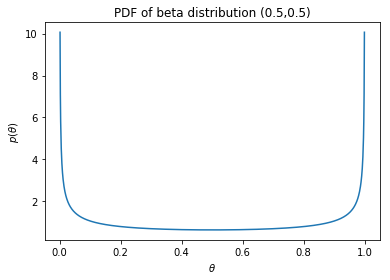

In [73]:
import matplotlib.pyplot as plt
import matplotlib as mpl

def __prior__(alpha, beta):
    x = np.linspace(0, 1, 1000)
    y = scipy.stats.beta(alpha, beta).pdf(x)
    fig, ax = plt.subplots()
    ax.plot(x, y)
    ax.set_xlabel(r"$\theta$")
    ax.set_ylabel(r"$p(\theta)$")
    ax.set_title("PDF of beta distribution ({},{})".format(alpha,beta));
    
__prior__(0.5, 0.5)

From the graph above, we shall see very high probability distribution on both sides of heads and tails, implying that this is a very biased coin just as how we believed. 

### Strong belief that the coin is unbaised

  In this case we have very strong belief that the coin is unbiased, probably because we have seen our friend tossing it many times, and the probability of heads converges to 0.5.  
  Anyways, we base our belief on the prior knowledge about the coin, so we should have very large values for both of the $\alpha$ and $\beta$ accordingly. Let's assume $\alpha = 100,~\beta = 100$ 
  
The PDF of our beta distribution should look like the following image:

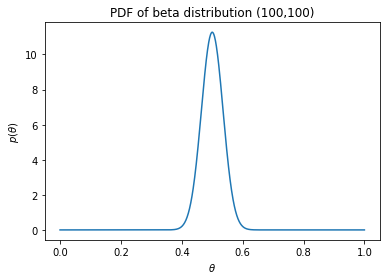

In [45]:
__prior__(100, 100)

From the graph above, we shall see the distribution centered at $\theta = 0.5$, meaning equal probability of getting heads and tails, which conforms with our belief that this is a very unbiased coin. 

### No informative knowledge about the bias of the coin

  Very sadly, in this case we have no informative prior knowledge about the prior.  
  To make sense of that, the value of our $\alpha$ and $\beta$ should represent our first trial on this coin. Therefore, we should have $\alpha = 1,~\beta = 1$  
  
Let's take a look at our PDF of beta distribution with no prior knowledge:

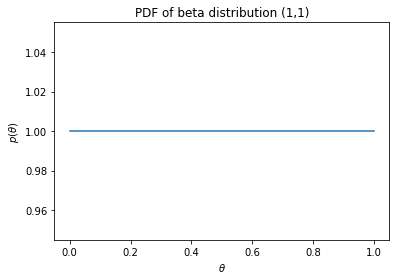

In [46]:
__prior__(1, 1)

In this case, we shall see a flat distribution, meaning that all biases are equally likely, which conforms with the fact that we have no informative knowledge about the prior. 

## 4.3
**Perform Bernoulli trials where each one of these views is correct.  Show how the posterior distribution of $\theta$ changes for each view for $n=0, 1, 2, 5, 10, \textrm{and} 100$.  Each view should have its own plot, with the plots of the posterior after different numbers of trials overlayed.**

### Strong belief that the coin is biased
  In this case we are having a very biased coin. Since it is impossible to bias towards both heads and tails, let's suppose that this is a very "heads likely" coin. So let's say $\theta = 0.9$

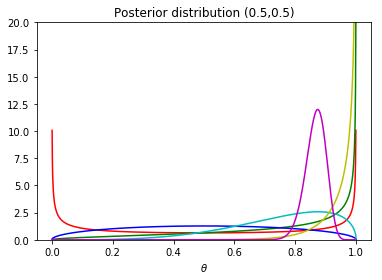

In [104]:
def __posterior_overlay__ (alpha, beta, theta):
    np.random.seed(491)
    fig, ax = plt.subplots()
    ## n = 0
    n = 0
    Y = np.random.binomial(1, theta, n)
    a1 = alpha + Y.sum()
    a2 = beta + n - Y.sum()
    x = np.linspace(0, 1, 1000)
    y = scipy.stats.beta(a1, a2).pdf(x)
    ax.plot(x, y, 'r')
    ## n = 1
    n = 1
    Y = np.random.binomial(1, theta, n)
    a1 = alpha + Y.sum()
    a2 = beta + n - Y.sum()
    x = np.linspace(0, 1, 1000)
    y = scipy.stats.beta(a1, a2).pdf(x)
    ax.plot(x, y, 'g');
    ## n = 2
    n = 2
    Y = np.random.binomial(1, theta, n)
    a1 = alpha + Y.sum()
    a2 = beta + n - Y.sum()
    x = np.linspace(0, 1, 1000)
    y = scipy.stats.beta(a1, a2).pdf(x)
    ax.plot(x, y, 'b');
    ## n = 5
    n = 5
    Y = np.random.binomial(1, theta, n)
    a1 = alpha + Y.sum()
    a2 = beta + n - Y.sum()
    x = np.linspace(0, 1, 1000)
    y = scipy.stats.beta(a1, a2).pdf(x)
    ax.plot(x, y, 'c');
    ## n = 10
    n = 10
    Y = np.random.binomial(1, theta, n)
    a1 = alpha + Y.sum()
    a2 = beta + n - Y.sum()
    x = np.linspace(0, 1, 1000)
    y = scipy.stats.beta(a1, a2).pdf(x)
    ax.plot(x, y, 'y');
    ## n = 100
    n = 100
    Y = np.random.binomial(1, theta, n)
    a1 = alpha + Y.sum()
    a2 = beta + n - Y.sum()
    x = np.linspace(0, 1, 1000)
    y = scipy.stats.beta(a1, a2).pdf(x)
    ax.plot(x, y, 'm');
    plt.ylim(0, 20)
    
    ax.set_xlabel(r"$\theta$")
    ax.set_title("Posterior distribution ({},{})".format(alpha, beta));

__posterior_overlay__(0.5, 0.5, 0.9)

### Strong belief that the coin is unbaised
In this case we are having a perfecly unbiased coin, which means $\theta = 0.5$

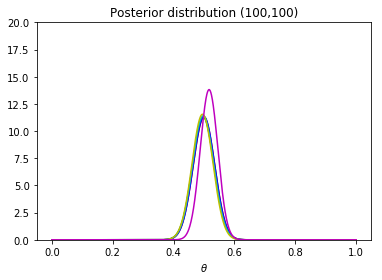

In [99]:
__posterior_overlay__(100, 100, 0.5)

### No informative knowledge about the bias of the coin
  In this case we have no prior knowledge about the bias of the coin, so whatever value for $\theta$ should be fine.  
  Let's just suppose that this is still a perfectly unbiased coin, which means $\theta = 0.5$.

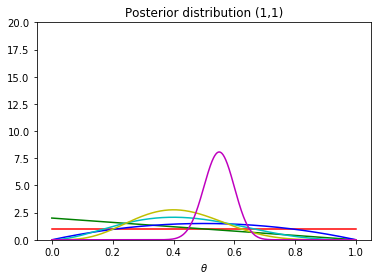

In [100]:
__posterior_overlay__(1, 1, 0.5)

## 4.4
**Is it possible that each view will always arrive at an accurate estimate of $\theta$?  How might you determine which view is most consistent with the data after $n$ trials?**


  In the previous part we went through the cases where each view is correct. In order to determine whether each view will always arrive at an accurate estimate of $\theta$, and which view is the most consistent one, let's perform a few more experiments on the three views together.  
  Let's have four different coins, with different $\theta$ values respectively: $0.2, 0.4, 0.6, 0.8$  
  To make this a fair game, none of the views makes "perfect" guess on the bias of the coin.  
  Also, to make our conclusion more accurate, let's perform 1000 trials on each coin.